**Sentiment classification** is the automated process of identifying opinions in text and labeling them as positive, negative, or neutral, based on the emotions customers express within them.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import nltk
import string
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading Data 

In [2]:
path = 'enterdatapathhere'
df = pd.read_csv(path, encoding= 'utf-8')
df.sample(5)

,review,sentiment
47978,I went to see this movie (actually I went to s...,0
7441,"Now, I'm a bit biased, since I'm a big fan of ...",1
27704,For a first film in a proposed series it achie...,1
44415,After having seen the Canadian/Icelandic/Briti...,0
13180,I'm not one of those folks who bemoans everyti...,0



# Data Preprocessing

1. **Tokenization**

2. Removing **Punctuations**

3. Removing tokens which are not alphabetic

4. **Stopwords Removal**: Because they do not effect on sentiment analysis. ( 'a' / 'an' / 'the' etc )




In [3]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

review_lines = []
lines = df['review'].values.tolist()

for line in lines:
  tokens = word_tokenize(line)
  tokens = [word.lower() for word in tokens]
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]
  words = [word for word in stripped if word.isalpha()]
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]
  review_lines.append(words)

review_lines[2]  

['recreational',
 'golfer',
 'knowledge',
 'sport',
 'history',
 'pleased',
 'disney',
 'sensitivity',
 'issues',
 'class',
 'golf',
 'early',
 'twentieth',
 'century',
 'movie',
 'depicted',
 'well',
 'psychological',
 'battles',
 'harry',
 'vardon',
 'fought',
 'within',
 'childhood',
 'trauma',
 'evicted',
 'inability',
 'break',
 'glass',
 'ceiling',
 'prevents',
 'accepted',
 'equal',
 'english',
 'golf',
 'society',
 'likewise',
 'young',
 'ouimet',
 'goes',
 'class',
 'struggles',
 'mere',
 'caddie',
 'eyes',
 'upper',
 'crust',
 'americans',
 'scoff',
 'attempts',
 'rise',
 'standing',
 'br',
 'br',
 'loved',
 'best',
 'however',
 'theme',
 'class',
 'manifested',
 'characters',
 'ouimet',
 'parents',
 'father',
 'workingclass',
 'drone',
 'sees',
 'value',
 'hard',
 'work',
 'intimidated',
 'upper',
 'class',
 'mother',
 'however',
 'recognizes',
 'son',
 'talent',
 'desire',
 'encourages',
 'pursue',
 'dream',
 'competing',
 'think',
 'inferior',
 'br',
 'br',
 'finally',
 'g

In [4]:
import gensim

embedding_dimension = 128
model = gensim.models.Word2Vec(sentences = review_lines, size = embedding_dimension,
                               window = 5, min_count = 1)
words = list(model.wv.vocab)
len(words)

134156

Testing W2C

In [5]:
model.wv.most_similar('fiction')

[('pulp', 0.786597490310669),
 ('fictionfantasy', 0.7658475637435913),
 ('science', 0.7445874214172363),
 ('fictionhorror', 0.6994146108627319),
 ('pornscience', 0.6854104399681091),
 ('sciencefiction', 0.6626852750778198),
 ('scifi', 0.6456371545791626),
 ('bwahahaha', 0.62993985414505),
 ('mollifies', 0.6295548677444458),
 ('epic', 0.6260235905647278)]

In [6]:
model.wv.most_similar(positive = ['fiction', 'hero'], negative =  ['human'])

[('pulp', 0.5358914136886597),
 ('gangster', 0.5307647585868835),
 ('plagiary', 0.5139117240905762),
 ('steven', 0.5019327402114868),
 ('chan', 0.5016313791275024),
 ('comedynot', 0.5007158517837524),
 ('psycho', 0.496582567691803),
 ('ideadependent', 0.49265965819358826),
 ('mystery', 0.4901253879070282),
 ('vein', 0.487085223197937)]

##### Find the odd word

In [7]:
model.wv.doesnt_match('earth space sun beach'.split())

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'beach'

## Save model in ASCII (word2vec) format

In [8]:
filename = 'my_word2vec_model.txt'
model.wv.save_word2vec_format(filename)

## Load the embeddings from the file into a dictionary

In [9]:
import os
embedding_idx = {} #dictionary

f = open('/content/my_word2vec_model.txt', encoding='utf-8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:])
  embedding_idx[word] = coefs

**Splitting the data** 

In [10]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
import numpy as np

## Splitting Train data further into Train & Test Sets

In [11]:
validation_split = 0.22

tokenizer = Tokenizer()
tokenizer.fit_on_texts(review_lines)
sequences = tokenizer.texts_to_sequences(review_lines)

max_len = 125
word_index = tokenizer.word_index

review_padded = pad_sequences(sequences, maxlen = max_len)
sentiments = df['sentiment'].values

indices = np.arange(review_padded.shape[0])
np.random.shuffle(indices)

review_padded = review_padded[indices]
sentiments = sentiments[indices]

validation_samples = int(validation_split * review_padded.shape[0])

X_val_pad = review_padded[:validation_samples]
y_val = sentiments[:validation_samples]

X_train_pad = review_padded[validation_samples:]
y_train = sentiments[validation_samples:]

print(X_train_pad.shape)
print(X_val_pad.shape)

(39000, 125)
(11000, 125)


In [12]:
test_split = 0.13

test_samples = int(test_split * X_train_pad.shape[0])

X_test_pad = X_train_pad[:test_samples]
y_test = y_train[:test_samples]

X_train_pad = X_train_pad[test_samples:]
y_train = y_train[test_samples:]

## Creating an Embedding Matrix

In [13]:
embedding_dims = 128
num_words = len(word_index) + 1

embedding_matrix = np.zeros((num_words, embedding_dims))

for word, i in word_index.items():
  if i > num_words:
    continue
  embedding_vector = embedding_idx.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector  

## Training 

In [22]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

embedding_layer = Embedding(num_words, embedding_dims,
                            embeddings_initializer = Constant(embedding_matrix),
                            input_length = max_len,
                            trainable = False) 

model = Sequential([
        embedding_layer,
        LSTM(embedding_dims, dropout = 0.4),
        Dense(128, activation= 'relu'),
        Dense(1, activation= 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 125, 128)          17172096  
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 17,320,321
Trainable params: 148,225
Non-trainable params: 17,172,096
_________________________________________________________________


## Training the Model

Use the .fit method.

Assign the model.fit() method to a variable, which will store the Training, Validation Loss and Accuracy for each epoch. 

In [23]:
history = model.fit(X_train_pad, y_train, epochs = 16, validation_data=(X_val_pad, y_val), batch_size = 64)

Epoch 1/16
531/531 [==============================] - 8s 12ms/step - loss: 0.5050 - accuracy: 0.7489 - val_loss: 0.3506 - val_accuracy: 0.8506
Epoch 2/16
531/531 [==============================] - 6s 12ms/step - loss: 0.3447 - accuracy: 0.8492 - val_loss: 0.3349 - val_accuracy: 0.8652
Epoch 3/16
531/531 [==============================] - 6s 11ms/step - loss: 0.3202 - accuracy: 0.8607 - val_loss: 0.3189 - val_accuracy: 0.8659
Epoch 4/16
531/531 [==============================] - 6s 11ms/step - loss: 0.3014 - accuracy: 0.8698 - val_loss: 0.3009 - val_accuracy: 0.8723
Epoch 5/16
531/531 [==============================] - 6s 12ms/step - loss: 0.2841 - accuracy: 0.8785 - val_loss: 0.2822 - val_accuracy: 0.8779
Epoch 6/16
531/531 [==============================] - 6s 11ms/step - loss: 0.2786 - accuracy: 0.8829 - val_loss: 0.2886 - val_accuracy: 0.8839
Epoch 7/16
531/531 [==============================] - 6s 12ms/step - loss: 0.2607 - accuracy: 0.8894 - val_loss: 0.2887 - val_accuracy: 0.8782

## Evaluating the Model on Test Set



In [18]:
model.evaluate(X_test_pad, y_test, batch_size = 64)

80/80 [==============================] - 1s 10ms/step - loss: 0.3388 - accuracy: 0.8757


[0.33878880739212036, 0.8757396340370178]

## Plotting the Accuracy and Loss 

Text(0.5, 1.0, 'Training and validation loss')

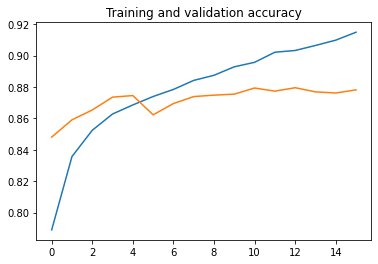

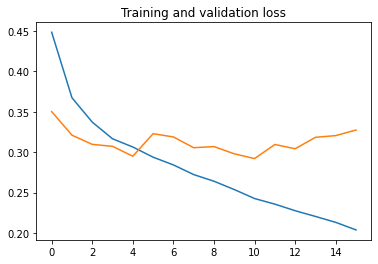

In [19]:
acc = history.history['accuracy' ]
val_acc = history.history['val_accuracy' ]
loss = history.history['loss' ]
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss )
plt.plot  ( epochs, val_loss)
plt.title ('Training and validation loss')

## Testing the Model on Sample data


In [20]:
sample1 = 'The movie was quite decent!'
sample2 = 'I do not know what to say... It was the worst!'

test_samples = [sample1, sample2]

test_samples_token = tokenizer.texts_to_sequences(test_samples)
test_samples_token_padded = pad_sequences(test_samples_token, maxlen = 100)

model.predict(test_samples_token_padded)

array([[0.5624525 ],
       [0.00376312]], dtype=float32)